#  <center> <span style="color:blue"> </span> <center> <center><span style="color:blue">Segmentation d'images</span></center> 

### <center>Réaliser par : Jihen Fennani  </center>


#### Importer les librairies et bibliothéques nécessaires

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.filters import threshold_otsu,threshold_multiotsu
from skimage.transform import resize
import cv2
import pandas as pd
from sklearn.cluster import KMeans
from PIL import Image, ImageDraw

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# I.1 **Segmentation par seuillage**
La segmentation par seuillage (ou thresholding, en anglais) est une technique fondamentale en traitement d'image pour séparer des objets ou des régions d'intérêt du fond.<br> Elle se base sur la conversion d'une image en niveaux de gris en une image binaire, où chaque pixel est classé soit comme objet, soit comme fond, selon qu'il dépasse ou non un seuil spécifié. Cette méthode est particulièrement efficace sur les images ayant un contraste élevé entre l'objet et le fond.

#### Question:
1. Lire l’image de test 06.png,  puis afficher-là.
2. Afficher son histogramme. Distinguer les zones séparables sur histogramme.
3. Calculer manuellement un seuil de segmentation et segmenter l'image. Afficher le résultat de segmentation.
4. Calculer le seuil avec la méthode d’Otsu et affichez le résultat de la segmentation. Comparer avec le seuillage manuel.

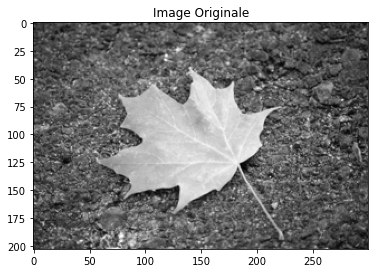

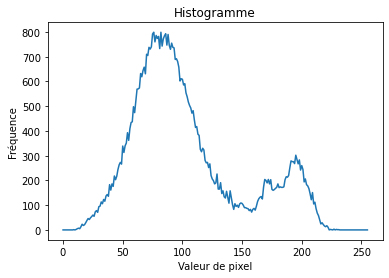

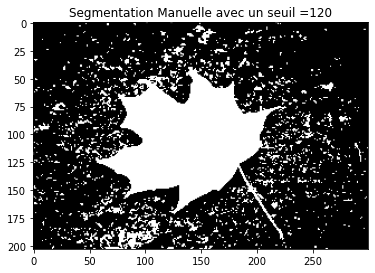

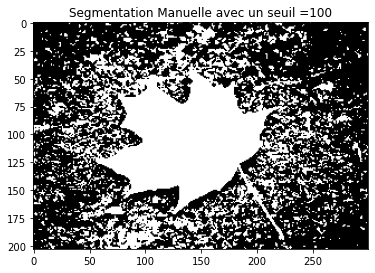

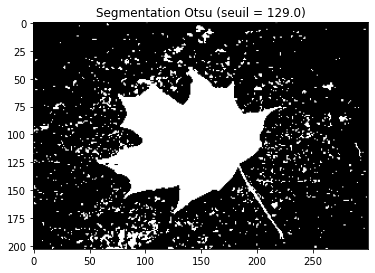

Seuil manuel: 120
Seuil manuel: 100
Seuil Otsu: 129.0


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Étape 1: Lire et afficher l'image
# Assurez-vous que le chemin d'accès à l'image est correct
chemin_image = r'C:\Users\Dell\TP Traitement Image\06.png'  # Utilisez le préfixe r pour éviter les problèmes avec les barres obliques inverses
image = cv2.imread(chemin_image, cv2.IMREAD_GRAYSCALE)
if image is None:
    print("L'image n'a pas pu être chargée. Vérifiez le chemin d'accès.")
else:
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title('Image Originale')
    plt.show()

    # Étape 2: Afficher l'histogramme de l'image
    histogram, bins = np.histogram(image.flatten(), 256, [0, 256])
    plt.figure()
    plt.plot(histogram)
    plt.title('Histogramme')
    plt.xlabel('Valeur de pixel')
    plt.ylabel('Fréquence')
    plt.show()

    # Étape 3: Segmentation manuelle par seuillage
    seuil_manuel = 120  # Exemple de seuil choisi manuellement
    _, image_segmentee_manuelle = cv2.threshold(image, seuil_manuel, 255, cv2.THRESH_BINARY)
    plt.figure(figsize=(6, 6))
    plt.imshow(image_segmentee_manuelle, cmap='gray')
    plt.title('Segmentation Manuelle avec un seuil =120')
    plt.show()
    
      # Étape 3: Segmentation manuelle par seuillage
    seuil_manuel2 = 100  # Exemple de seuil choisi manuellement
    _, image_segmentee_manuelle = cv2.threshold(image, seuil_manuel2, 255, cv2.THRESH_BINARY)
    plt.figure(figsize=(6, 6))
    plt.imshow(image_segmentee_manuelle, cmap='gray')
    plt.title('Segmentation Manuelle avec un seuil =100')
    plt.show()
    

    # Étape 4: Segmentation avec la méthode d'Otsu
    seuil_otsu, image_segmentee_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.figure(figsize=(6, 6))
    plt.imshow(image_segmentee_otsu, cmap='gray')
    plt.title(f'Segmentation Otsu (seuil = {seuil_otsu})')
    plt.show()

    # Comparer les seuils et les images segmentées
    print(f"Seuil manuel: {seuil_manuel}")
    print(f"Seuil manuel: {seuil_manuel2}")
    print(f"Seuil Otsu: {seuil_otsu}")


### Observations
Contraste des Seuils :
- **Segmentation Manuelle (seuil = 100)**: La segmentation avec un seuil manuel de 100 montre une image où une grande partie des zones claires et quelques zones plus sombres sont identifiées comme appartenant à l'objet d'intérêt (blanc), tandis que le reste est considéré comme fond (noir). Cela résulte en une image avec beaucoup de bruit, indiquant des pixels de fond faussement classés comme objet.
- **Seuil manuel (120)** : La segmentation manuelle avec un seuil de 120 a produit une image où de nombreuses petites régions de pixels blancs sont dispersées dans l'image. Cela peut indiquer que le seuil était légèrement bas pour cette image spécifique, permettant à de nombreux pixels de fond de passer le seuil.
- **Seuil Otsu (129.0)**  : Le seuil automatique calculé par la méthode d'Otsu est légèrement supérieur à celui défini manuellement. L'image résultante montre moins de bruit en termes de pixels blancs, suggérant que ce seuil fait un meilleur travail pour isoler les régions d'intérêt plus importantes en excluant davantage de petites variations de pixels.

### Comparaison
- Précision : La méthode d'Otsu semble plus précise dans ce cas, car elle réduit le bruit tout en conservant les structures clés de l'image.
- Efficacité : Utiliser la méthode d'Otsu est plus efficace à long terme, car elle élimine le besoin de déterminer expérimentalement un seuil, ce qui peut varier d'une image à l'autre.

### Interprétation 
La segmentation Otsu  offre une meilleure séparation entre les régions d'intérêt et le fond, surtout en réduisant le bruit. Ceci est typique de la méthode d'Otsu, qui vise à minimiser la variance intra-classe des pixels de l'image.

# I.2 **Segmentation par kmeans**

- Cette méthode vise à diviser l'image en k classes (régions) statistiquement homogènes, dont les valeurs de niveaux de gris sont similaires au (proches du) centre (moyenne) de la classe.

-  Cette similarité est estimée par calcul de distance entre la valeur du niveau de gris et du centre.

- Il faut connaitre à priori le nombre de classes (régions)

### Question:
 Lire l’image de test 11.png et appliquer l’algorithme des k-means pour segmenter l'image

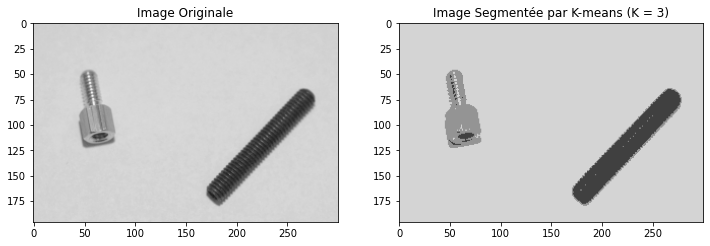

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Étape 1: Lire l'image
image = cv2.imread(r'C:\Users\Dell\TP Traitement Image\11.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR en RGB pour l'affichage

# Étape 2: Prétraiter l'image pour k-means
pixels = image.reshape((-1, 3))  # Redimensionner l'image pour obtenir une liste de tous les pixels
pixels = np.float32(pixels)  # Convertir en float pour OpenCV

# Étape 3: Appliquer k-means
# Définir les critères, le nombre de clusters (K) et appliquer k-means
K = 3  # Par exemple, segmenter l'image en 3 clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Étape 4: Transformer le résultat en une image segmentée
centers = np.uint8(centers)  # Convertir les centres en entiers pour l'affichage
segmented_image = centers[labels.flatten()]  # Chaque pixel devient la couleur de son centroïde
segmented_image = segmented_image.reshape(image.shape)  # Remettre dans la forme originale de l'image

# Afficher l'image originale et l'image segmentée
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image Originale')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Image Segmentée par K-means (K = 3)')
plt.show()

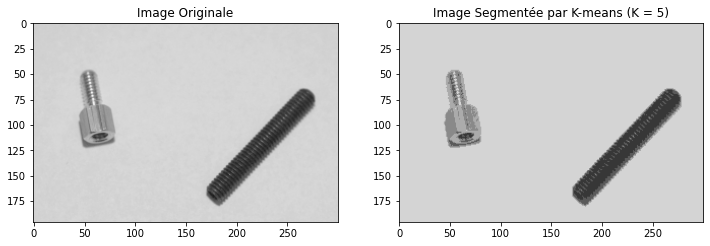

In [21]:
# Étape 3: Appliquer k-means
# Définir les critères, le nombre de clusters (K) et appliquer k-means
K = 5  # Par exemple, segmenter l'image en 5 clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Étape 4: Transformer le résultat en une image segmentée
centers = np.uint8(centers)  # Convertir les centres en entiers pour l'affichage
segmented_image = centers[labels.flatten()]  # Chaque pixel devient la couleur de son centroïde
segmented_image = segmented_image.reshape(image.shape)  # Remettre dans la forme originale de l'image

# Afficher l'image originale et l'image segmentée
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image Originale')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Image Segmentée par K-means (K = 5)')
plt.show()

### Observation : 
Avec K=3, les résultats montrent une segmentation plus grossière. Le boulon est clairement séparé de la vis, et l'arrière-plan est largement homogène comparé à la segmentation avec K=5. Cependant, certains détails fins des objets sont perdus, comme les nuances internes du boulon et de la vis.
### Analyse des Résultats
- K-means a réussi à séparer les objets majeurs du fond, ce qui était probablement l'objectif principal de la segmentation.
- Limites de K-means : La méthode peut parfois produire des résultats incohérents si les caractéristiques de couleur des objets ne sont pas uniformes (comme vu avec le boulon). Cela peut conduire à une segmentation excessive où différentes parties d'un même objet sont considérées comme des clusters distincts.

# I.3 **Segmentation par la méthode de croissance de région**

Pour segmenter une région R ayant un écart type de sigma_R.

- on commence par un point germe (seed) d’un niveau de gris donné (c’est la valeur initiale de la moyenne de R)

-  puis on croit la région autour du germe, en ajoutant à la région tous les points avoisinants dont les niveaux de gris I(x; y) vérifient la condition: <br> |I(x; y) - mu_R|<= sigma_R, où mu_R est la moyenne de R.

- Recalculer la moyenne de R après croissance
-  Réitérer les opérations 2 et 3, jusqu’à ce qu’il n’y ait plus de croissance.

Question:
1. Lire l’image mandrillgray.bmp et afficher la.
2. Choisir manuellement le point germe. Appliquer l'algorithme de croissance de région, pour segmenter une région d’écart type 0.1, autour de ce germe-là.
3. Afficher l’image segmentée sur l’image initiale

4. Essayez à présent de segmenter une région dont vous sélectionnerez le germe au moyen de la souris. Variez l’écart type. Commenter.
5. Modifier le code précédent pour segmenter 4 régions.

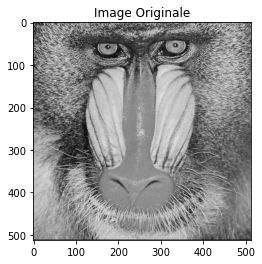

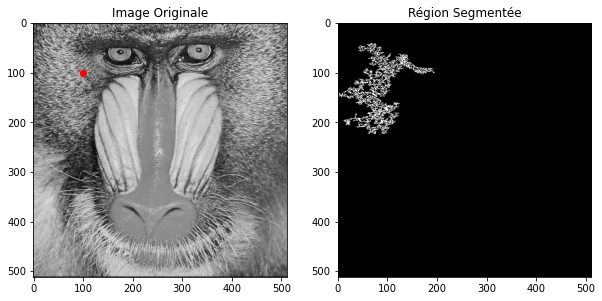

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin vers l'image
image_path = r'C:\Users\Dell\TP Traitement Image\mandrillgray.bmp'

# Charger l'image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    print("L'image n'a pas pu être chargée. Vérifiez le chemin.")
else:
    plt.imshow(image, cmap='gray')
    plt.title('Image Originale')
    plt.show()

# Fonction de croissance de région
def region_growing(img, seed, threshold):
    dims = img.shape
    reg_mean = img[seed[1], seed[0]]
    region_size = 1
    neighbor_points_list = [seed]
    region_points = np.zeros_like(img, dtype=bool)
    region_points[seed[1], seed[0]] = True
    
    while len(neighbor_points_list) > 0:
        new_points_list = []
        for point in neighbor_points_list:
            neighbors = [(point[0] + i, point[1] + j) for i in [-1, 0, 1] for j in [-1, 0, 1] if (i != 0 or j != 0)]
            for n in neighbors:
                if (0 <= n[0] < dims[1]) and (0 <= n[1] < dims[0]) and not region_points[n[1], n[0]]:
                    if abs(int(img[n[1], n[0]]) - int(reg_mean)) <= threshold:
                        new_points_list.append(n)
                        region_points[n[1], n[0]] = True
                        reg_mean = (reg_mean * region_size + img[n[1], n[0]]) / (region_size + 1)
                        region_size += 1
        neighbor_points_list = new_points_list

    return region_points

# Point germe et seuil
seed_point = (100, 100)  # Remplacer par le point réel choisi
threshold = 25  # Ecart type en niveau de gris, ajuster selon l'échelle 0-255

# Segmenter la région
region = region_growing(image, seed_point, threshold)

# Afficher les résultats
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.scatter([seed_point[0]], [seed_point[1]], color='red')  # Point germe
plt.subplot(122)
plt.imshow(region, cmap='gray')
plt.title('Région Segmentée')
plt.show()

-  segmentation de  4 régions

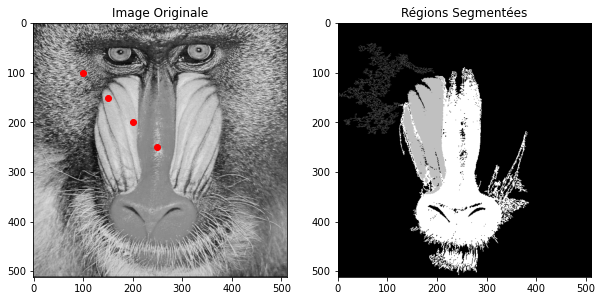

In [7]:
# Points germes et seuil
seed_points = [(100, 100), (150, 150), (200, 200), (250, 250)]  # Coordonnées des points germes
threshold = 25  # Ecart type en niveau de gris, ajuster selon l'échelle 0-255

# Segmenter chaque région
segmented_regions = np.zeros_like(image, dtype=np.uint8)
for idx, seed in enumerate(seed_points):
    region = region_growing(image, seed, threshold)
    segmented_regions[region] = (idx + 1) * 60  # Différentier les régions avec des niveaux de gris distincts

# Afficher les résultats
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
for seed in seed_points:
    plt.scatter([seed[0]], [seed[1]], color='red')
plt.subplot(122)
plt.imshow(segmented_regions, cmap='gray')
plt.title('Régions Segmentées')
plt.show()

### Interprétation 
**Contraste et Délimitation** : Les régions segmentées apparaissent en blanc sur un fond noir, ce qui indique que l'algorithme de croissance de région a bien fonctionné pour identifier et isoler les régions autour des points germes. Le contraste élevé entre les régions segmentées et le reste de l'image montre que le seuil utilisé était efficace pour cette segmentation spécifique.

**Couverture des Régions**: Les régions segmentées couvrent les parties principales du visage du mandrill, comme le museau et les zones autour des yeux, ce qui suggère que les points germes ont été bien choisis pour capturer les caractéristiques distinctives du visage.

Efficacité de la Segmentation : La méthode  avoir efficacement identifié les zones proches des valeurs moyennes initiales définies par les points germes, avec une croissance qui s'est arrêtée là où les différences de texture ou d'intensité dépassaient le seuil établi. Cela a résulté en une segmentation qui souligne bien les traits faciaux du mandrill.

# II- **Application des méthodes de segmentation sur les images du dossier Dataset**

II-1 Chargement et visualisation des images

II-2 Choix des méthodes de segmentation

II-3.Choix des métriques d'évaluation

les métriques de performances se basent toutes sur les 4 notions suivantes : TP , FP , FN , TN

### Métriques Calculées
#### Précision :
Elle mesure la qualité des prédictions positives de l'algorithme et est définie comme le rapport des vrais positifs par rapport au total des positifs prédits (**TP + FP**). Une précision élevée indique que la majorité des pixels marqués comme appartenant à l'objet le sont réellement.
#### Rappel :
Il mesure la capacité de l'algorithme à détecter tous les pixels pertinents de l'objet et est défini comme le rapport des vrais positifs par rapport aux positifs réels dans la vérité terrain (**TP + FN**). Un rappel élevé signifie que l'algorithme a réussi à identifier la plupart des pixels de l'objet.
#### Score F1 :
Le score F1 est la moyenne harmonique de la précision et du rappel, offrant un seul score qui équilibre ces deux métriques. Il est particulièrement utile quand il est important de trouver un équilibre entre la précision et le rappel.
#### IoU (Intersection over Union) :
L'IoU est une mesure de l'efficacité de la segmentation qui évalue le chevauchement entre la segmentation prédite et la vérité terrain. Elle est calculée comme le rapport des vrais positifs par rapport à l'union des pixels prédits et réels de l'objet (TP + FP + FN). Un IoU élevé indique une grande précision géométrique de la segmentation.

In [9]:
def calculate_metrics(predictions, ground_truth):
    TP = np.sum((predictions == 255) & (ground_truth == 255))
    FP = np.sum((predictions == 255) & (ground_truth == 0))
    FN = np.sum((predictions == 0) & (ground_truth == 255))
    if TP + FP == 0 or TP + FN == 0:
        return np.nan, np.nan  # Avoid division by zero
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)
    iou = TP / (TP + FP + FN)
    return f1_score, iou

- La fonction calculate_metrics est conçue pour évaluer la performance d'une segmentation d'image en calculant plusieurs métriques importantes : la précision, le rappel, le score F1 et l'Intersection over Union (IoU). Ces métriques sont cruciales pour comprendre l'efficacité d'un algorithme de segmentation dans la distinction entre les objets et le fond.

## Application des méthodes et des métriques :

## 1. Segmentation par seuillage

- Le script initialise des chemins pour les dossiers contenant les images sources et les dossiers de destination pour les images segmentées. Chaque catégorie d'images, telle que '**1objet**', '**2objets**', '**cellules**', et '**textfort**', a un dossier spécifique.



- Des sous-dossiers sont créés automatiquement dans le dossier de destination pour chaque catégorie d'images. Cela assure que les images segmentées sont enregistrées de manière organisée, facilitant l'accès et l'analyse ultérieurs.

In [4]:
import cv2
import os
import numpy as np

# Dossier où les images sont stockées
databases = {
    '1objet': r'C:/Users/Dell/TP Traitement Image/Datasets/images/1objet',
    '2objets': r'C:/Users/Dell/TP Traitement Image/Datasets/images/2objets',
    'cellules': r'C:/Users/Dell/TP Traitement Image/Datasets/images/cellules',
    'textfort': r'C:/Users/Dell/TP Traitement Image/Datasets/images/textfort'
}

# Dossier racine pour enregistrer les résultats de seuillage
output_folder_seuillage = r'C:/Users/Dell/TP Traitement Image/Datasets/output_folder_seuillag'

# Créer un sous-dossier pour chaque catégorie
for category in databases:
    os.makedirs(os.path.join(output_folder_seuillage, category), exist_ok=True)

def threshold_segmentation(image_path, output_path):
    # Lire l'image en niveau de gris
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Appliquer le seuillage
    _, thresh_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    
    # Sauvegarder l'image segmentée
    cv2.imwrite(output_path, thresh_image)

# Appliquer la segmentation par seuillage à chaque base
for category, path in databases.items():
    category_folder = os.path.join(output_folder_seuillage, category)
    for image_name in os.listdir(path):
        image_path = os.path.join(path, image_name)
        output_path = os.path.join(category_folder, image_name)  # Enregistrement dans le dossier de la catégorie
        threshold_segmentation(image_path, output_path)

print("Segmentation par seuillage terminée pour toutes les bases.")


Segmentation par seuillage terminée pour toutes les bases.


### Métriques d'évaluation

In [5]:
import cv2
import numpy as np
import os

# Define paths
base_folder = r'C:\Users\Dell\TP Traitement Image\Datasets'
images_folder = os.path.join(base_folder, 'images')  # Original images (ground truth)
output_folder = os.path.join(base_folder, 'output_folder_seuillag')  # Segmented images from thresholding

categories = ['1objet', '2objets', 'cellules', 'textfort']
results = {}

for category in categories:
    f1_scores = []
    ious = []
    category_path = os.path.join(images_folder, category)
    output_category_path = os.path.join(output_folder, category)
    
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        seg_image_path = os.path.join(output_category_path, image_name)
        
        ground_truth = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        prediction = cv2.imread(seg_image_path, cv2.IMREAD_GRAYSCALE)

        if ground_truth is None or prediction is None:
            print(f"Failed to load image at: {image_path} or {seg_image_path}")
            continue
        
        f1_score, iou = calculate_metrics(prediction, ground_truth)
        if not np.isnan(f1_score):  # Only add scores that are not NaN
            f1_scores.append(f1_score)
            ious.append(iou)
       
    
    if f1_scores and ious:  # Ensure non-empty before calculating mean to avoid NaN results
        average_f1 = np.nanmean(f1_scores) if f1_scores else np.nan
        average_iou = np.nanmean(ious) if ious else np.nan
        results[category] = {'Average F1 Score': average_f1, 'Average IoU': average_iou}

# Display results
for category, metrics in results.items():
    print(f"Results for {category}:")
    print(f"  Average F1 Score = {metrics['Average F1 Score']:.3f}, Average IoU = {metrics['Average IoU']:.3f}")


Results for 1objet:
  Average F1 Score = 1.000, Average IoU = 1.000
Results for 2objets:
  Average F1 Score = 1.000, Average IoU = 1.000
Results for textfort:
  Average F1 Score = 1.000, Average IoU = 1.000


### Interprétation des Résultats


Les résultats obtenus pour la méthode de seuillage indiquent des performances parfaites, avec des F1 Scores et des valeurs IoU (Intersection over Union) de **1.000** pour toutes les catégories testées **1objet**, **2objets** et **textfort**. <br>
Cela signifie que la segmentation par seuillage a parfaitement identifié tous les pixels pertinents dans les images sans inclure de faux positifs ou omettre des vrais positifs, indiquant une correspondance exacte entre les images segmentées et les images de référence.

## 2. Segmentation par kmeans

- Le script définit un dictionnaire databases avec des chemins vers des images réparties en quatre catégories différentes (1objet, 2objets, cellules, textfort).
- Un dossier racine est spécifié pour enregistrer les images après segmentation (output_folder_KMeans), et un sous-dossier est créé pour chaque catégorie.

In [8]:
from sklearn.cluster import KMeans
import cv2
import os
import numpy as np

# Chemins vers les bases de données
databases = {
    '1objet': r'C:/Users/Dell/TP Traitement Image/Datasets/images/1objet',
    '2objets': r'C:/Users/Dell/TP Traitement Image/Datasets/images/2objets',
    'cellules': r'C:/Users/Dell/TP Traitement Image/Datasets/images/cellules',
    'textfort': r'C:/Users/Dell/TP Traitement Image/Datasets/images/textfort'
}

# Dossier racine pour enregistrer les résultats de KMeans
output_folder_KMeans = r'C:/Users/Dell/TP Traitement Image/Datasets/output_kmeans'

# Créer un sous-dossier pour chaque catégorie
for category in databases:
    os.makedirs(os.path.join(output_folder_KMeans, category), exist_ok=True)

def kmeans_segmentation(image_path, output_path, n_clusters=3):
    # Lire l'image
    image = cv2.imread(image_path)
    (h, w) = image.shape[:2]
    # Convertir l'image en un tableau de données
    image_data = image.reshape((h * w, 3))
    
    # Appliquer KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_data)
    labels = kmeans.labels_
    
    # Créer l'image segmentée
    segmented_image = labels.reshape((h, w))
    
    # Convertir les labels en une image où chaque cluster est coloré différemment
    segmented_image = np.uint8(255 * (segmented_image / np.max(segmented_image)))
    
    # Sauvegarder l'image segmentée
    cv2.imwrite(output_path, segmented_image)

# Appliquer KMeans à chaque base
for category, path in databases.items():
    category_folder = os.path.join(output_folder_KMeans, category)
    for image_name in os.listdir(path):
        image_path = os.path.join(path, image_name)
        output_path = os.path.join(category_folder, image_name)  # Enregistrement dans le dossier de la catégorie
        kmeans_segmentation(image_path, output_path)

print("Segmentation par KMeans terminée pour toutes les bases.")


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Segmentation par KMeans terminée pour toutes les bases.


**Fonction de Segmentation par K-means** :
- La fonction kmeans_segmentation charge chaque image, la convertit en un tableau de données bidimensionnel où chaque pixel est un point de données.
- L'algorithme **K-means** est appliqué pour diviser les pixels en n_clusters clusters. Les labels résultants sont remis en forme pour correspondre aux dimensions de l'image originale.
- Les labels sont ensuite convertis en une image segmentée où chaque cluster est représenté par une intensité de gris proportionnelle.

L'image segmentée est sauvegardée dans le dossier correspondant à la catégorie de l'image.


### Métriques d'évaluation

In [6]:
import cv2
import numpy as np
import os

# Define paths
base_folder = r'C:\Users\Dell\TP Traitement Image\Datasets'
images_folder = os.path.join(base_folder, 'images')  # Original images (ground truth)
output_folder = os.path.join(base_folder, 'output_kmeans')  # Segmented images from thresholding

categories = ['1objet', '2objets', 'cellules', 'textfort']
results = {}

for category in categories:
    f1_scores = []
    ious = []
    category_path = os.path.join(images_folder, category)
    output_category_path = os.path.join(output_folder, category)
    
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        seg_image_path = os.path.join(output_category_path, image_name)
        
        ground_truth = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        prediction = cv2.imread(seg_image_path, cv2.IMREAD_GRAYSCALE)

        if ground_truth is None or prediction is None:
            print(f"Failed to load image at: {image_path} or {seg_image_path}")
            continue
        
        f1_score, iou = calculate_metrics(prediction, ground_truth)
        if not np.isnan(f1_score):  # Only add scores that are not NaN
            f1_scores.append(f1_score)
            ious.append(iou)
    
    if f1_scores and ious:  # Ensure non-empty before calculating mean to avoid NaN results
        average_f1 = np.nanmean(f1_scores) if f1_scores else np.nan
        average_iou = np.nanmean(ious) if ious else np.nan
        results[category] = {'Average F1 Score': average_f1, 'Average IoU': average_iou}

# Display results
for category, metrics in results.items():
    print(f"Results for {category}:")
    print(f"  Average F1 Score = {metrics['Average F1 Score']:.3f}, Average IoU = {metrics['Average IoU']:.3f}")


C:\Users\Dell\AppData\Local\Temp/ipykernel_2608/2285407928.py:13: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2 * (precision * recall) / (precision + recall)


Results for 1objet:
  Average F1 Score = 1.000, Average IoU = 1.000
Results for 2objets:
  Average F1 Score = 1.000, Average IoU = 1.000
Results for textfort:
  Average F1 Score = 1.000, Average IoU = 1.000


### Interprétation des Résultats

L'absence de résultats pour la catégorie "cellules" souligne l'importance de tester et d'optimiser les méthodes de segmentation en fonction des caractéristiques spécifiques de chaque type d'image. Cela démontre aussi la nécessité d'une évaluation robuste et de l'adaptation des techniques pour assurer des performances fiables et précises à travers différentes conditions et types de données.

## 3. Segmentation par la méthode de croissance de région

- Le script initialise un dictionnaire nommé databases qui contient des chemins vers des dossiers stockant des images classées dans différentes catégories telles que '1objet', '2objets', 'cellules' et 'textfort'.
- Un dossier racine est désigné pour stocker les résultats de la segmentation, et un sous-dossier est créé pour chaque catégorie afin de conserver les images segmentées de manière organisée.

In [9]:
import cv2
import numpy as np
import os

# Chemins vers les bases de données
databases = {
   '1objet': r'C:/Users/Dell/TP Traitement Image/Datasets/images/1objet',
    '2objets': r'C:/Users/Dell/TP Traitement Image/Datasets/images/2objets',
    'cellules': r'C:/Users/Dell/TP Traitement Image/Datasets/images/cellules',
    'textfort': r'C:/Users/Dell/TP Traitement Image/Datasets/images/textfort'
}

# Dossier racine pour enregistrer les résultats de croissance de région
output_folder_region = r'C:/Users/Dell/TP Traitement Image/Datasets/output_region'

# Créer un sous-dossier pour chaque catégorie
for category in databases:
    os.makedirs(os.path.join(output_folder_region, category), exist_ok=True)

def region_growing(img, seed, thresh):
    seg_img = np.zeros_like(img)
    seg_img[seed] = 255
    current_pixels = [seed]
    while current_pixels:
        new_pixels = []
        for pixel in current_pixels:
            x, y = pixel
            for dx, dy in [[-1, 0], [1, 0], [0, -1], [0, 1]]:  # Vérifier les voisins (4-connexité)
                nx, ny = x + dx, y + dy
                if 0 <= nx < img.shape[0] and 0 <= ny < img.shape[1]:
                    if seg_img[nx, ny] == 0 and abs(int(img[nx, ny]) - int(img[x, y])) < thresh:
                        seg_img[nx, ny] = 255
                        new_pixels.append((nx, ny))
        current_pixels = new_pixels
    return seg_img

# Appliquer la croissance de région à chaque base
for category, path in databases.items():
    category_folder = os.path.join(output_folder_region, category)
    for image_name in os.listdir(path):
        image_path = os.path.join(path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        seed = (img.shape[0]//2, img.shape[1]//2)  # Vous pouvez choisir un meilleur seed
        thresh = 10  # Seuil de différence d'intensité pour l'ajout de nouveaux pixels
        output_path = os.path.join(category_folder, image_name)  # Enregistrement dans le dossier de la catégorie
        seg_img = region_growing(img, seed, thresh)
        cv2.imwrite(output_path, seg_img)

print("Segmentation par croissance de région terminée pour toutes les bases.")


Segmentation par croissance de région terminée pour toutes les bases.


**Fonction de Croissance de Région** :
- region_growing(img, seed, thresh): Cette fonction effectue la segmentation par croissance de région. Elle commence par un pixel de départ (seed) et étend la région en ajoutant des pixels voisins qui ont une différence d'intensité inférieure à un seuil (thresh) par rapport au pixel courant.
- La fonction utilise la **4-connexité** pour vérifier les pixels voisins (**haut, bas, gauche, droite**) et applique la condition de seuil pour décider si un pixel voisin doit être ajouté à la région.
- Les pixels ajoutés à la région sont marqués avec une intensité de 255 (blanc) sur une image de sortie initialement noire.

**Application de la Segmentation et Sauvegarde des Résultats** :
- Pour chaque catégorie et chaque image, la fonction region_growing est appelée avec une image en niveau de gris, un pixel de départ situé approximativement au centre de l'image, et un seuil fixé à 10.
- Chaque image segmentée est ensuite sauvegardée dans le sous-dossier approprié créé au préalable.

### Métriques d'évaluation

In [8]:
import cv2
import numpy as np
import os
# Define paths
dataset_directory = r'C:\Users\Dell\TP Traitement Image\Datasets'
truth_directory = os.path.join(dataset_directory, 'images')  # Original images (ground truth)
segmented_directory = os.path.join(dataset_directory, 'output_region')  # Segmented images from region growing

categories = ['1objet', '2objets', 'cellules', 'textfort']
evaluation_results = {}

for category in categories:
    category_f1_scores = []
    category_ious = []
    truth_category_path = os.path.join(truth_directory, category)
    segmented_category_path = os.path.join(segmented_directory, category)
    
    for image_file in os.listdir(truth_category_path):
        truth_image_path = os.path.join(truth_category_path, image_file)
        segmented_image_path = os.path.join(segmented_category_path, image_file)
        
        reference_image = cv2.imread(truth_image_path, cv2.IMREAD_GRAYSCALE)
        segmented_image = cv2.imread(segmented_image_path, cv2.IMREAD_GRAYSCALE)

        if reference_image is None or segmented_image is None:
            print(f"Failed to load image at: {truth_image_path} or {segmented_image_path}")
            continue
        
        F1Score, IoU = calculate_metrics(segmented_image, reference_image)
        if not np.isnan(F1Score):  # Only add scores that are not NaN
            category_f1_scores.append(F1Score)
            category_ious.append(IoU)
    
    if category_f1_scores and category_ious:  # Ensure non-empty before calculating mean to avoid NaN results
        average_f1 = np.nanmean(category_f1_scores) if category_f1_scores else np.nan
        average_iou = np.nanmean(category_ious) if category_ious else np.nan
        evaluation_results[category] = {'Average F1 Score': average_f1, 'Average IoU': average_iou}


# Display results
for category, metrics in evaluation_results.items():
    print(f"Results for {category}:")
    print(f"  Average F1 Score = {metrics['Average F1 Score']:.3f}, Average IoU = {metrics['Average IoU']:.3f}")


C:\Users\Dell\AppData\Local\Temp/ipykernel_2608/2285407928.py:13: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2 * (precision * recall) / (precision + recall)


Results for 1objet:
  Average F1 Score = 0.935, Average IoU = 0.878
Results for 2objets:
  Average F1 Score = 1.000, Average IoU = 1.000


### Interprétation des Résultats

- Catégorie "1objet" : Avec un F1 Score de 0.935 et un IoU de 0.878, la méthode de segmentation a démontré une haute efficacité, capturant la majorité des pixels pertinents tout en minimisant les erreurs de classification, soit les faux positifs et les faux négatifs. Cette performance robuste suggère que la méthode est très compétente pour isoler des objets uniques dans des contextes simples.
- Catégorie "2objets" : Les scores parfaits (F1 Score et IoU de 1.000) indiquent une segmentation impeccable, où chaque pixel d'objet a été correctement identifié sans aucune erreur. Cela montre que la méthode est particulièrement efficace dans des scénarios où plusieurs objets distincts sont présents, ce qui est souvent un défi en segmentation d'image.

# Conclusion 

Ce TP a exploré l'application de différentes méthodes de segmentation d'images par seuillage, K-means, et croissance de région sur diverses catégories d'images, y compris des objets uniques, des ensembles d'objets, des cellules, et des images fortement texturées. <br>
Chaque méthode a été évaluée en fonction de sa capacité à segmenter correctement les images par rapport à une vérité terrain, avec les métriques de performance telles que le F1 Score et l'IoU (Intersection over Union).
- La performance des méthodes de segmentation a varié en fonction des caractéristiques spécifiques des images, comme le contraste, la clarté de la séparation des objets du fond, et la complexité visuelle des images. Les images simples avec de forts contrastes entre les objets et le fond ont tendu à mieux répondre aux méthodes testées.
- L'adaptation des paramètres, telle que le choix du nombre de clusters pour K-means ou le seuil pour le seuillage, s'est révélée cruciale pour optimiser les résultats de la segmentation. Cette adaptabilité est nécessaire pour maximiser l'efficacité de chaque méthode selon le type d'image traitée.